In [1]:
import pandas as pd


In [2]:
#cleaning data and merging 
covid = pd.read_csv("COVID19-death-US.csv", parse_dates = ['date'])
overall = pd.read_csv('overall.csv', parse_dates = ['post_date'])
result = covid.merge(overall, how='left', left_on='date', right_on='post_date')
result2 = covid.merge(overall, left_on='date', right_on='post_date')

#reading in industry, geography and job_family
industry = pd.read_csv('industry.csv', parse_dates = ['post_date'])
jobfam = pd.read_csv('job_family.csv', parse_dates = ['post_date'])
geo = pd.read_csv('geography.csv', parse_dates = ['post_date'])

In [3]:
# web scrape state political affiliations
import urllib.request
from bs4 import BeautifulSoup

In [4]:
url = "https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states"

page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables = soup.find_all("table")
right_table = soup.find_all('table', class_ = "sortable wikitable")

In [5]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []

for row in right_table[0].findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 9:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[4].find(text = True))
        F.append(cells[5].find(text = True))
        G.append(cells[6].find(text = True))
        H.append(cells[7].find(text = True))
        I.append(cells[8].find(text = True))
    elif len(cells) == 8:
        A.append(cells[0].find(text = True))
        B.append(cells[1].find(text = True))
        C.append(cells[2].find(text = True))
        D.append(cells[3].find(text = True))
        E.append(cells[3].find(text = True))
        F.append(cells[4].find(text = True))
        G.append(cells[5].find(text = True))
        H.append(cells[6].find(text = True))
        I.append(cells[7].find(text = True))

In [6]:
df = pd.DataFrame(A, columns = ['State'])
df['2020 presidential election'] = list(map(str.strip, B))
df['Governor'] = list(map(str.strip, C))
df['State Senate'] = list(map(str.strip, D))
df['State House'] = list(map(str.strip, E))
df['Senior U.S. Senator'] = list(map(str.strip, F))
df['Junior U.S. Senator'] = list(map(str.strip, G))
df['U.S. House of Reprsentatives'] = list(map(str.strip, H))
df['party registration'] = list(map(str.strip, I))

In [7]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

df['State Abbreviation'] = states

In [8]:
df.head()

,State,2020 presidential election,Governor,State Senate,State House,Senior U.S. Senator,Junior U.S. Senator,U.S. House of Reprsentatives,party registration,State Abbreviation
0,Alabama,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican,AL
1,Alaska,Republican,Republican,Republican 13–7,Coalition 23–17,Republican,Republican,Republican,Republican,AK
2,Arizona,Democratic,Republican,Republican 16–14,Republican 31–29,Democratic,Democratic,Democratic 5–4,Republican,AZ
3,Arkansas,Republican,Republican,Republican 28–7,Republican 77–23,Republican,Republican,Republican 4,Republican,AR
4,California,Democratic,Democratic,Democratic 31–9,Democratic 59–19–1,Democratic,Democratic,Democratic 42–11,Democratic,CA


In [11]:
state_party = df[['State Abbreviation', 'Governor']]
state_party.head()

,State Abbreviation,Governor
0,AL,Republican
1,AK,Republican
2,AZ,Republican
3,AR,Republican
4,CA,Democratic


In [13]:
geo.head()

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,AK,1.0
2,2020-03-01,AL,1.0
3,2020-03-01,AR,1.0
4,2020-03-01,AZ,1.0


In [15]:
geo_party = state_party.merge(geo, right_on = 'state', left_on = 'State Abbreviation')

In [17]:
clean_geo = geo_party.drop(columns = ['State Abbreviation'])

In [18]:
clean_geo.head()

,Governor,post_date,state,count_id_indexed
0,Republican,2020-03-01,AL,1.0000
1,Republican,2020-03-02,AL,1.0065
2,Republican,2020-03-03,AL,1.0451
3,Republican,2020-03-04,AL,1.0885
4,Republican,2020-03-05,AL,1.0865


In [25]:
groups = clean_geo.drop(columns=['state']).groupby(['post_date', 'Governor']).mean()
groups.head()

count_id_indexed
post_date  Governor                    
2020-03-01 Democratic          1.000000
           Republican          1.000000
2020-03-02 Democratic          1.017613
           Republican          1.012985
2020-03-03 Democratic          1.043513

<AxesSubplot:xlabel='post_date', ylabel='count_id_indexed'>

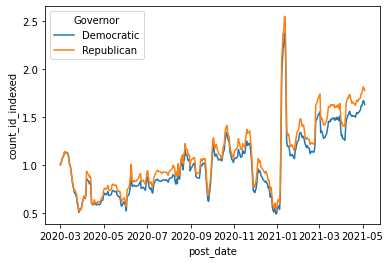

In [28]:
import seaborn as sns
sns.lineplot(x='post_date', y='count_id_indexed', hue='Governor', data=groups)

In [19]:
repub_states = clean_geo[clean_geo['Governor'] == 'Republican']
dem_states = clean_geo[clean_geo['Governor'] == 'Democratic']

In [20]:
repub_states

,Governor,post_date,state,count_id_indexed
0,Republican,2020-03-01,AL,1.0000
1,Republican,2020-03-02,AL,1.0065
2,Republican,2020-03-03,AL,1.0451
3,Republican,2020-03-04,AL,1.0885
4,Republican,2020-03-05,AL,1.0865
...,...,...,...,...
21494,Republican,2021-04-30,WY,1.5846
21495,Republican,2021-05-01,WY,1.6417
21496,Republican,2021-05-02,WY,1.7058
21497,Republican,2021-05-03,WY,1.7140


In [23]:
r_avg_day = repub_states[['post_date', 'count_id_indexed']].groupby(['post_date']).mean()
r_avg_day.head()

,count_id_indexed
post_date,
2020-03-01,1.000000
2020-03-02,1.012985
2020-03-03,1.037030
2020-03-04,1.065393
2020-03-05,1.076396


In [21]:
dem_states

,Governor,post_date,state,count_id_indexed
1720,Democratic,2020-03-01,CA,1.0000
1721,Democratic,2020-03-02,CA,1.0062
1722,Democratic,2020-03-03,CA,1.0125
1723,Democratic,2020-03-04,CA,1.0305
1724,Democratic,2020-03-05,CA,1.0467
...,...,...,...,...
21064,Democratic,2021-04-30,WI,1.7202
21065,Democratic,2021-05-01,WI,1.7271
21066,Democratic,2021-05-02,WI,1.7669
21067,Democratic,2021-05-03,WI,1.7652


In [24]:
d_avg_day = dem_states[['post_date', 'count_id_indexed']].groupby(['post_date']).mean()
d_avg_day.head()

,count_id_indexed
post_date,
2020-03-01,1.000000
2020-03-02,1.017613
2020-03-03,1.043513
2020-03-04,1.071213
2020-03-05,1.088587


In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(data=result2[['date', 'new_cases', 'new_cases_smoothed']])

In [ ]:
result2.plot.line(x='date', y='new_deaths')

In [ ]:
#overall hiring trend
result2.plot.line(x='date', y='count_id_indexed')

In [ ]:
result2['date']

In [ ]:
%matplotlib inline
temp = result2.sort_values('date')
temp['date_f'] = pd.factorize(temp['date'])[0] + 1
mapping = dict(zip(temp['date_f'], temp['date'].dt.date))

ax = sns.regplot('date_f', 'count_id_indexed', data=temp)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)

We notice that there is an overall linearly positive trend, except for the drop in January. We see that this rapid drop happens during the week before December 25 and 1 week after New Years.

In [ ]:
jobfam.head()

In [ ]:
%matplotlib tk
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = jobfam)

In [ ]:
wanted_cat = ['Healthcare', 'Food & Beverage', 'Facilities/Constr']
subset = jobfam[jobfam['job_family'].isin(wanted_cat)]
sns.lineplot(x='post_date', y='count_id_indexed', hue='job_family', data = subset)

In [ ]:
healthcare = jobfam[jobfam['job_family'] == 'Healthcare']
job_cases = result2.merge(healthcare, how='inner', left_on='date', right_on='post_date')

In [ ]:
job_cases

In [ ]:
sns.lineplot('total_cases', 'count_id_indexed_y', data=job_cases)

In [ ]:
sns.lineplot('total_cases', 'count_id_indexed_x', data=job_cases)

In [ ]:
sns.lineplot('total_deaths', 'count_id_indexed_y', data=job_cases)

In [ ]:
sns.lineplot('date', 'new_deaths_smoothed', data=job_cases)

In [ ]:
sns.scatterplot(data=result2, x='count_id_indexed', y='new_cases')